# Import modules

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
import os,sys
from IPython.display import display


2023-05-04 16:53:40.476325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 16:53:40.574261: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# The dataset

## Read the dataset

In [6]:
dataCO2f='./DS4B-CO2-data/dataCO2.csv'
dataCO2=pd.read_csv(dataCO2f,sep=";",header=0)
display(dataCO2)
# describe() generates descriptive statistics
display(dataCO2.describe().style.format("{0:.2f}"))

,IL,cation,anion,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],...,[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
0,[BMIM][BF4],[BMIM],[BF4],0.610,363.15,246.00,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[BMIM][BF4],[BMIM],[BF4],0.500,383.15,235.00,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[BMIM][BF4],[BMIM],[BF4],0.610,353.15,223.30,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[BMIM][BF4],[BMIM],[BF4],0.500,373.15,198.00,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[BMIM][BF4],[BMIM],[BF4],0.610,343.15,188.50,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,[HMIM][Tf2N],[HMIM],[Tf2N],0.592,298.15,35.86,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
10112,[HMIM][Tf2N],[HMIM],[Tf2N],0.239,343.15,27.54,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
10113,[HMIM][Tf2N],[HMIM],[Tf2N],0.396,298.15,20.15,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
10114,[HMIM][Tf2N],[HMIM],[Tf2N],0.140,343.15,17.93,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0


,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],CH=CH,CH=CH2,[Im13],[MIm],[MMIM],[Py],[MPy],[MPyrro],[MPip],[NH3],[NH2],[NH],[N],[P],[S],[BF4],[Cl],[DCA],[NO3],[PF6],[SCN],[TCB],[C(CN)3],[HSO4],[FSA],[Tf2N],[BETA],[FOR],[TFA],[C3F7CO2],[MeSO4],[EtSO4],[MDEGSO4],[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
count,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00,10116.00
mean,0.33,325.27,54.21,1.18,4.72,0.02,0.02,0.04,0.04,0.01,0.06,0.00,0.00,0.01,0.77,0.01,0.00,0.01,0.09,0.00,0.00,0.01,0.00,0.02,0.05,0.00,0.11,0.02,0.02,0.02,0.11,0.02,0.01,0.07,0.00,0.01,0.43,0.00,0.01,0.01,0.00,0.02,0.01,0.01,0.02,0.05,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00
std,0.24,25.24,76.66,0.96,5.48,0.25,0.16,0.20,0.39,0.10,0.28,0.06,0.06,0.10,0.42,0.08,0.07,0.11,0.29,0.06,0.07,0.09,0.06,0.16,0.23,0.06,0.31,0.12,0.15,0.12,0.31,0.14,0.08,0.26,0.04,0.11,0.49,0.03,0.11,0.11,0.05,0.13,0.11,0.10,0.15,0.23,0.09,0.08,0.06,0.10,0.03,0.07,0.04,0.05
min,0.00,243.20,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,308.15,10.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.30,323.15,26.80,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.51,342.59,64.76,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.95,453.15,499.90,7.00,28.00,3.00,2.00,1.00,5.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Data distribution

       x_CO2
[CH3]       
0        855
1       8350
2        108
3         92
4        639
7         72


array([[<Axes: title={'center': '[CH3]'}>]], dtype=object)

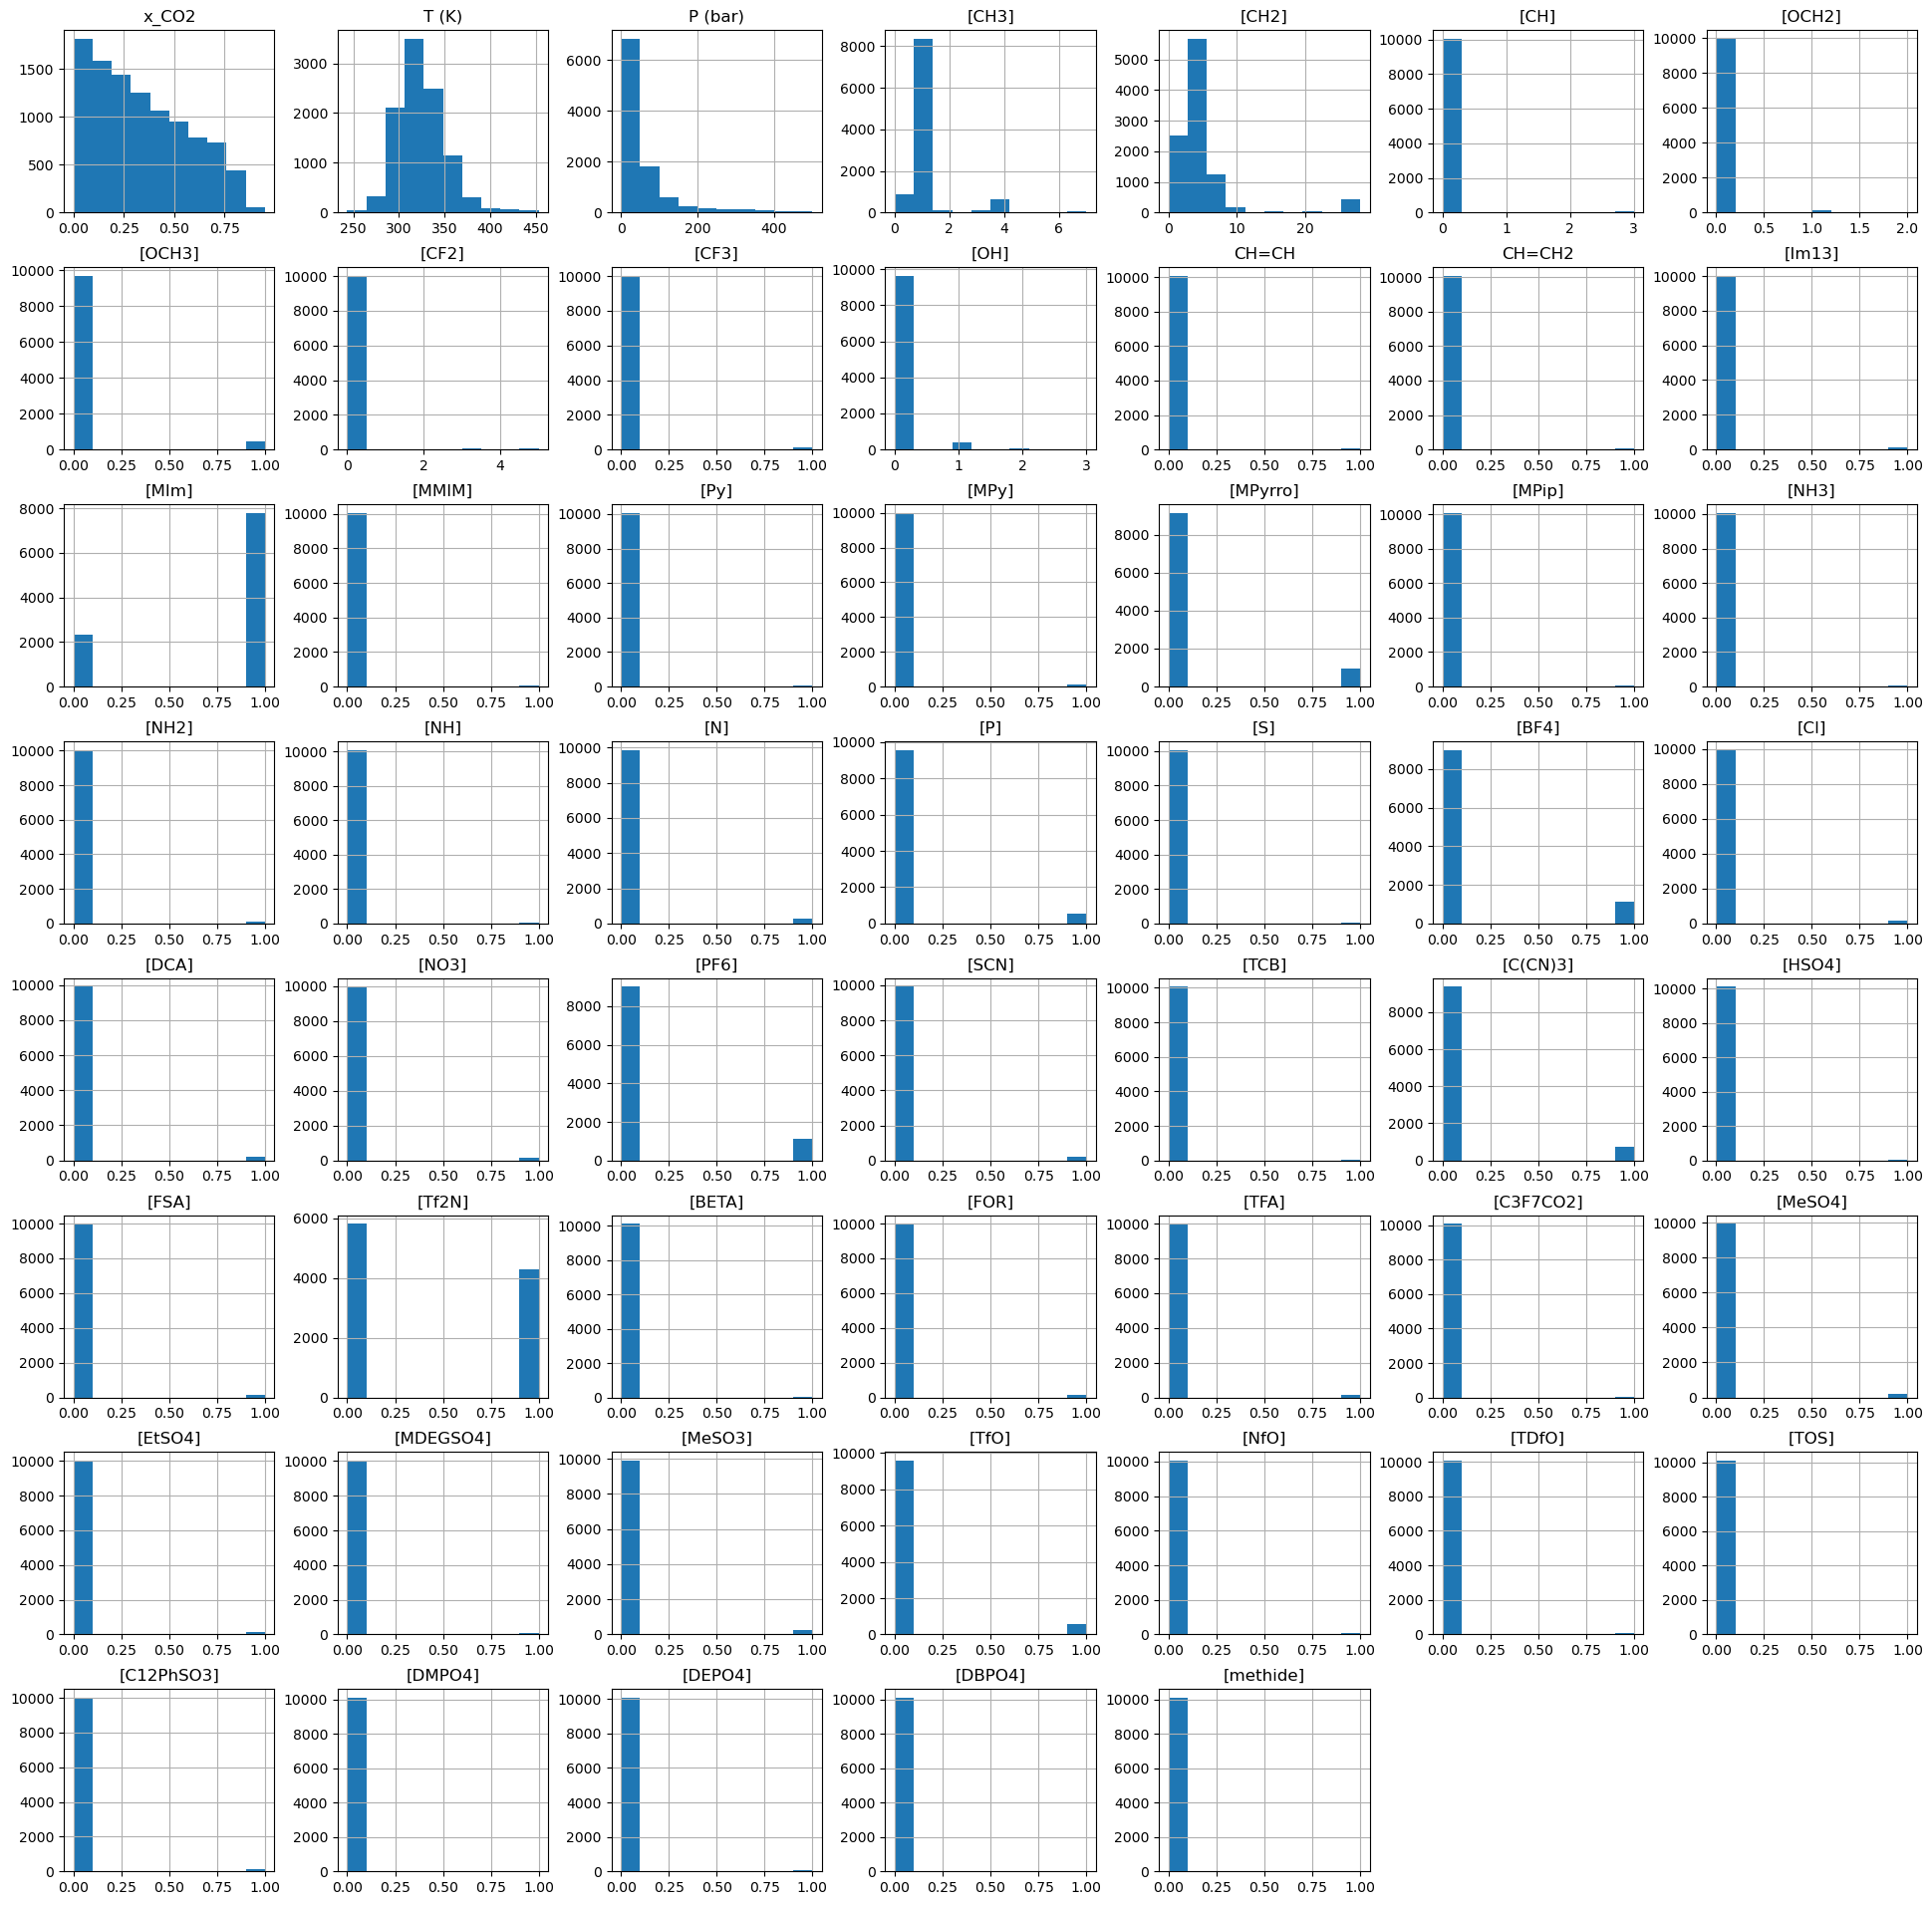

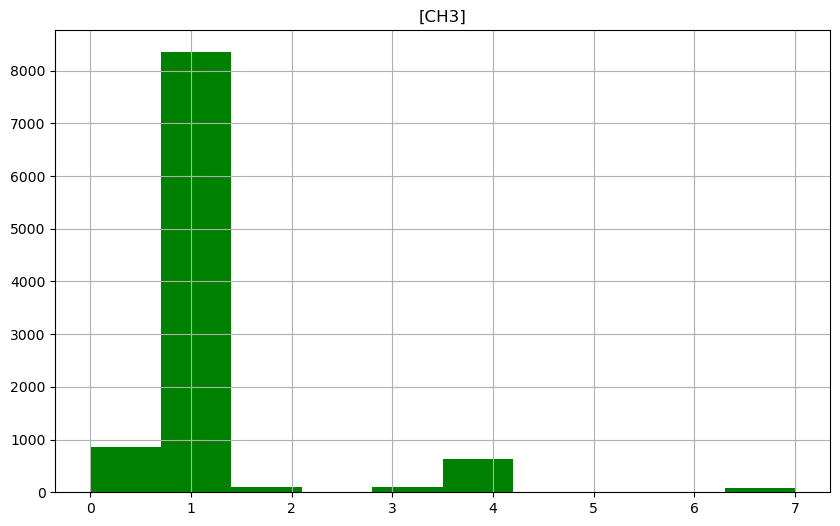

In [7]:
dataCO2.hist(figsize=(24,24))
print(dataCO2[["x_CO2", "[CH3]"]].groupby("[CH3]").count())
dataCO2.hist("[CH3]",figsize=(10,6),facecolor='g')

# Data standardization

In [8]:
X=dataCO2.drop(['IL','cation','anion','x_CO2'],axis=1)
y = dataCO2['x_CO2']

print("X before standardization")
display(X)

# print("y before standardization")
# display(y)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X.values)
Xsc = scaler.transform(X.values)
X = pd.DataFrame(Xsc, index=X.index, columns=X.columns)

# scaler.fit(y.values.reshape(-1, 1))
# ysc = scaler.transform(y.values.reshape(-1, 1))
# y = pd.DataFrame(ysc, index=y.index)

print("scaling done")

print("X after standardization")
display(X)

print("y")
display(y)

X before standardization


,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],...,[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
0,363.15,246.00,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,383.15,235.00,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,353.15,223.30,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,373.15,198.00,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,343.15,188.50,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,298.15,35.86,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10112,343.15,27.54,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10113,298.15,20.15,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10114,343.15,17.93,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


scaling done
X after standardization


,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],...,[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
0,1.500742,2.501854,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
1,2.293124,2.358359,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
2,1.104551,2.205733,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
3,1.896933,1.875695,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
4,0.708360,1.751768,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,-1.074499,-0.239419,-0.183557,0.050373,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
10112,0.708360,-0.347953,-0.183557,0.050373,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
10113,-1.074499,-0.444355,-0.183557,0.050373,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
10114,0.708360,-0.473315,-0.183557,0.050373,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561


y


0        0.610
1        0.500
2        0.610
3        0.500
4        0.610
         ...  
10111    0.592
10112    0.239
10113    0.396
10114    0.140
10115    0.139
Name: x_CO2, Length: 10116, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
X_train

,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],...,[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
8698,-0.084022,-0.681135,-0.183557,-0.496769,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
1961,-1.074103,-0.576762,-1.223230,-0.496769,-0.084667,-0.120283,-0.209673,7.527123,9.957832,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
9374,-0.084022,0.606418,-0.183557,0.050373,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
3953,-1.260709,-0.428049,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
1883,-0.084814,0.077444,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-1.668785,-0.615897,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
7813,-0.084022,-0.589820,1.895791,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
905,-0.084022,-0.661424,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
5192,0.708360,-0.626463,-1.223230,-0.496769,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,3.358938,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561


In [11]:
X_test

,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],...,[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
6020,-0.876404,-0.624220,-0.183557,0.415134,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
6201,1.507081,0.163541,2.935465,4.245129,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
8916,-0.084022,-0.642770,-1.223230,-0.314389,-0.084667,6.056288,4.769327,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
916,-1.074499,-0.674469,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
3484,1.896933,1.212227,-0.183557,-0.679150,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,1.104551,0.517712,-0.183557,0.597515,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
5729,0.312169,0.271162,-0.183557,0.415134,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
7701,-0.480213,-0.655032,-1.223230,-0.679150,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,-0.240932,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561
2489,0.763827,0.310297,-0.183557,-0.314389,-0.084667,-0.120283,-0.209673,-0.097226,-0.100423,-0.204298,...,-0.152529,4.150545,-0.08815,-0.076593,-0.059761,-0.105809,-0.034462,-0.075277,-0.04222,-0.04561


In [12]:
y_train

8698    0.0379
1961    0.2790
9374    0.4570
3953    0.5012
1883    0.6020
         ...  
2895    0.1580
7813    0.1412
905     0.0401
5192    0.0350
235     0.4576
Name: x_CO2, Length: 8092, dtype: float64

In [13]:
y_test

6020    0.2019
6201    0.6010
8916    0.0677
916     0.0458
3484    0.5700
         ...  
6691    0.6370
5729    0.6779
7701    0.0843
2489    0.4574
2951    0.0450
Name: x_CO2, Length: 2024, dtype: float64

# SVR

## Fitting and prediction

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', epsilon=0.1, C=1.0,gamma=0.209)
regressor.fit(X_train, y_train.values.ravel())
y_pred=regressor.predict(X_test)

## Metrics

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MSE= ", mse)
print("MAE= ", mae)
print("R2= ", r2)

MSE=  0.003980754789607239
MAE=  0.05083276959307177
R2=  0.93104412632862


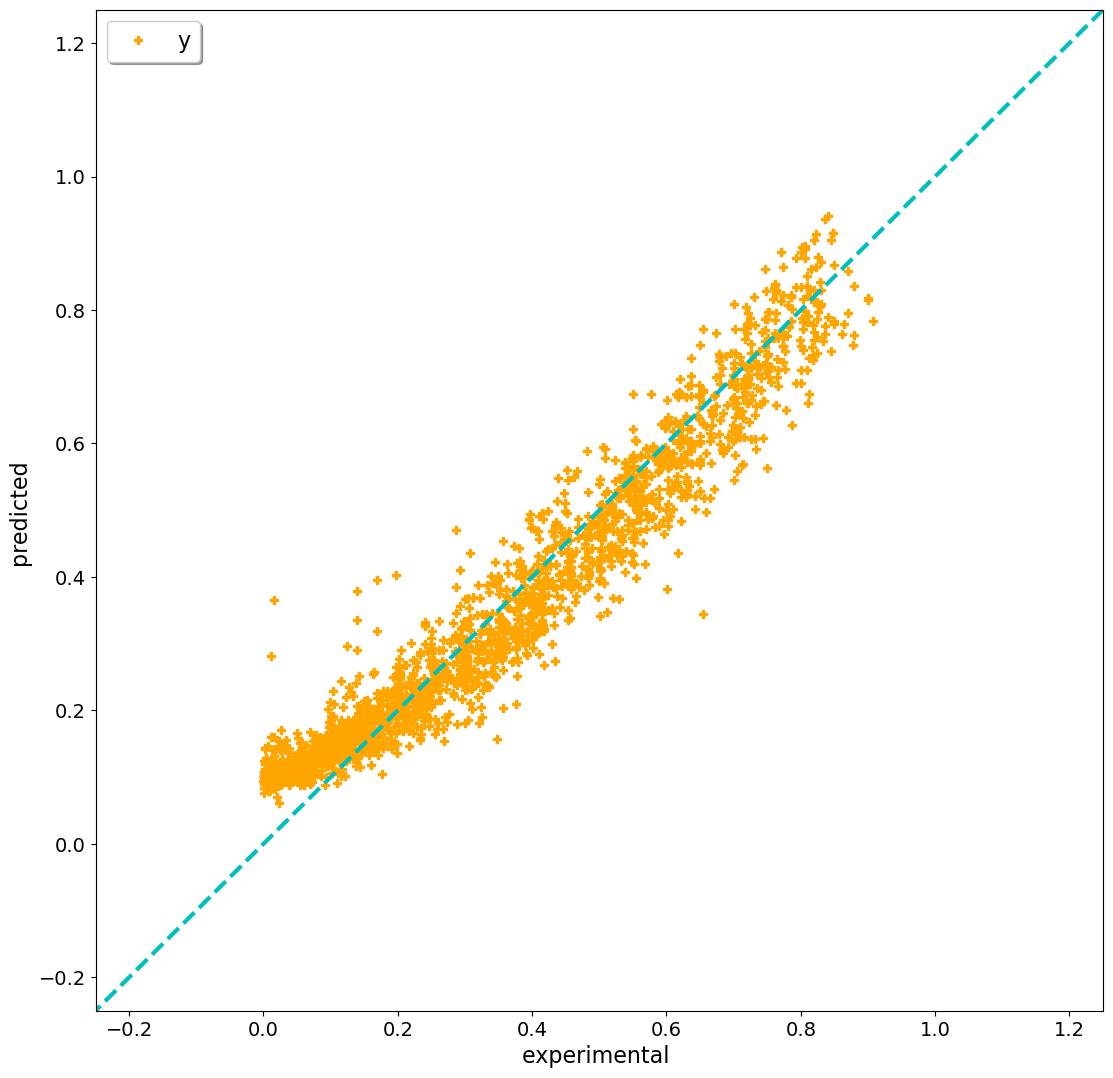

In [17]:
from pylab import *

xD=[-200,7000]
yD=[-200,7000]
fig = plt.figure(figsize=(13, 13))
plt.rcParams["font.size"] = (18) #font size
plt.tick_params(labelsize = 14)
plot(y_test,y_pred,'P',color="orange",label='y')
#plot(y_test,ytest_hat,'P',color="red",label='test set')
plot(xD,yD,'c',linestyle='--',lw=3)
xlabel('experimental ',fontsize=16)
ylabel('predicted ',fontsize=16)
xlim(-0.25,1.25);ylim(-0.25,1.25) 
#xlim(-3,150);ylim(-40,150) 
legend( shadow=True, fontsize='16')

# Hyperparameter tuning

In [18]:
gamma_values=[0.1,0.2,0.5,1,5,10]
c_values=[0.01,0.1,1,10,100]
epsilon_values=[0.001,0.01,1,10]

# gamma_values=[0.001,0.01,0.1]
# c_values=[0.001,0.01,0.1]
# epsilon_values=[0.001,0.01,0.1]

In [ ]:
gamma_list=[]
c_list=[]
epsilon_list=[]
mse_list=[]
mae_list=[]
r2_list=[]

for gam in gamma_values:
    for ce in c_values:
        for eps in epsilon_values:
            regressor = SVR(kernel = 'rbf', epsilon=eps, C=ce,gamma=gam)
            regressor.fit(X_train, y_train.values.ravel())
            y_pred=regressor.predict(X_test)
            print("gamma= ", gam)
            print("C= ", ce)
            print("Epsilon= ", eps)
            print()

            mse=mean_squared_error(y_test,y_pred)
            mae=mean_absolute_error(y_test,y_pred)
            r2=r2_score(y_test,y_pred)
            
            gamma_list.append(gam)
            c_list.append(ce)
            epsilon_list.append(eps)
            
            mse_list.append(mse)
            mae_list.append(mae)
            r2_list.append(r2)

gamma=  0.1
C=  0.01
Epsilon=  0.001

gamma=  0.1
C=  0.01
Epsilon=  0.01

gamma=  0.1
C=  0.01
Epsilon=  1

gamma=  0.1
C=  0.01
Epsilon=  10

gamma=  0.1
C=  0.1
Epsilon=  0.001

gamma=  0.1
C=  0.1
Epsilon=  0.01

gamma=  0.1
C=  0.1
Epsilon=  1

gamma=  0.1
C=  0.1
Epsilon=  10

gamma=  0.1
C=  1
Epsilon=  0.001

gamma=  0.1
C=  1
Epsilon=  0.01

gamma=  0.1
C=  1
Epsilon=  1

gamma=  0.1
C=  1
Epsilon=  10

gamma=  0.1
C=  10
Epsilon=  0.001

gamma=  0.1
C=  10
Epsilon=  0.01

gamma=  0.1
C=  10
Epsilon=  1

gamma=  0.1
C=  10
Epsilon=  10

gamma=  0.1
C=  100
Epsilon=  0.001

gamma=  0.1
C=  100
Epsilon=  0.01

gamma=  0.1
C=  100
Epsilon=  1

gamma=  0.1
C=  100
Epsilon=  10

gamma=  0.2
C=  0.01
Epsilon=  0.001

gamma=  0.2
C=  0.01
Epsilon=  0.01

gamma=  0.2
C=  0.01
Epsilon=  1

gamma=  0.2
C=  0.01
Epsilon=  10

gamma=  0.2
C=  0.1
Epsilon=  0.001

gamma=  0.2
C=  0.1
Epsilon=  0.01

gamma=  0.2
C=  0.1
Epsilon=  1

gamma=  0.2
C=  0.1
Epsilon=  10

gamma=  0.2
C=  1
Epsilo

In [ ]:
gamma_list=pd.DataFrame(gamma_list, columns=['gamma'])
c_list=pd.DataFrame(c_list, columns=['C'])
epsilon_list=pd.DataFrame(epsilon_list, columns=['epsilon'])
mse_list=pd.DataFrame(mse_list, columns=['MSE'])
mae_list=pd.DataFrame(mae_list, columns=['MAE'])
r2_list=pd.DataFrame(r2_list, columns=['R2'])

metrics=pd.concat([gamma_list,c_list,epsilon_list,mse_list,mae_list,r2_list],axis=1)

In [ ]:
metrics

In [ ]:
metrics.to_csv('metrics2.csv', encoding='utf-8', index=False)

In [ ]:
from pylab import*
print("BEST MSE")
bestMSE=metrics['MSE'].idxmin()
print(metrics.loc[bestMSE])
print()
print("BEST MAE")
bestMAE=metrics['MAE'].idxmin()
print(metrics.loc[bestMAE])
print()
print("BEST R2")
bestR2=metrics['R2'].idxmax()
print(metrics.loc[bestR2])

In [34]:
from sklearn.svm import SVR
regressor1 = SVR(kernel = 'rbf', epsilon=0.001, C=100.0,gamma=0.5)
regressor1.fit(X_train, y_train.values.ravel())
y_pred=regressor1.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MSE= ", mse)
print("MAE= ", mae)
print("R2= ", r2)

MSE=  0.0009073957473466651
MAE=  0.015560288341814091
R2=  0.9842818083928858


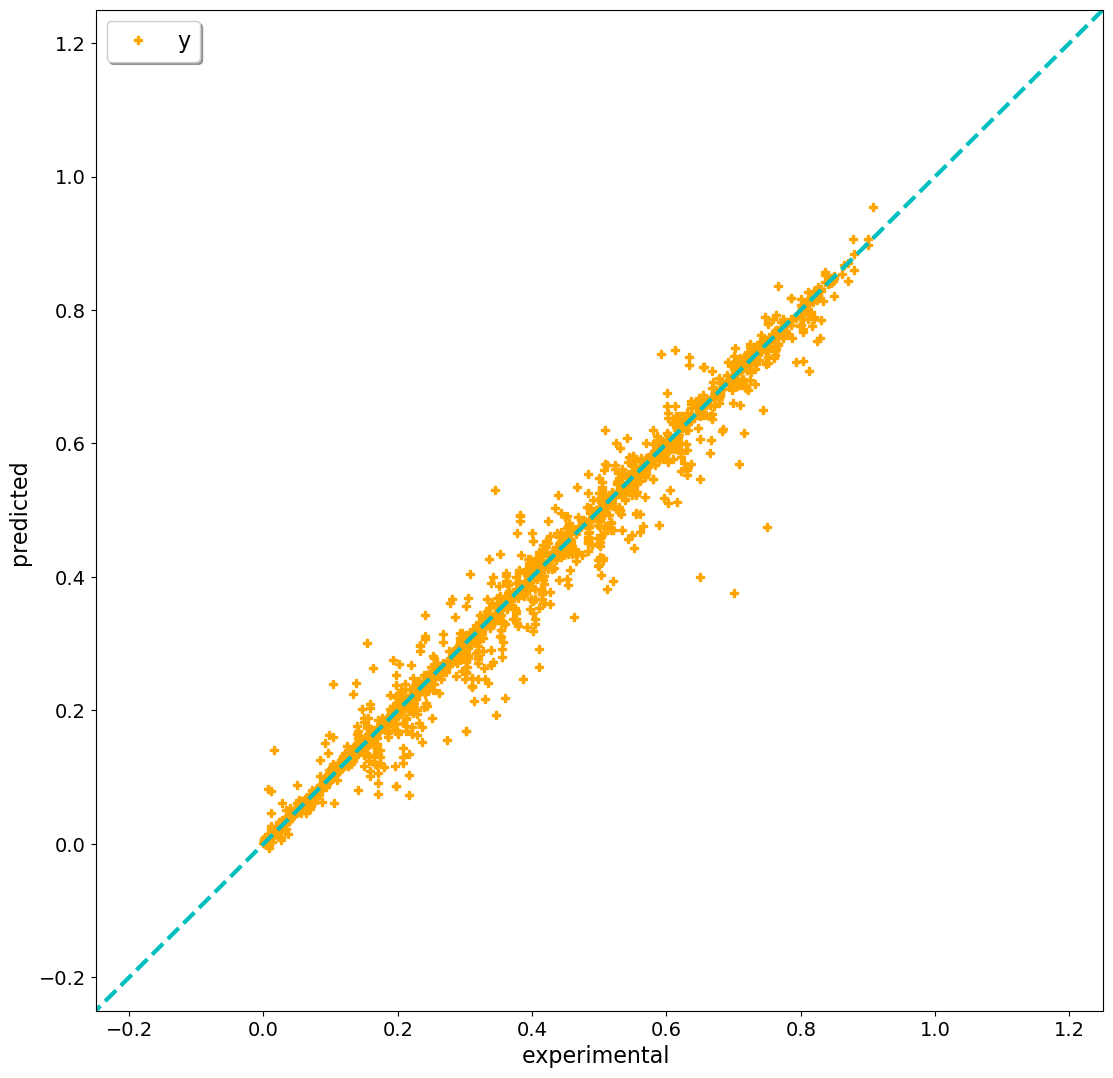

In [36]:
from pylab import *
xD=[-200,7000]
yD=[-200,7000]
fig = plt.figure(figsize=(13, 13))
plt.rcParams["font.size"] = (18) #font size
plt.tick_params(labelsize = 14)
plot(y_test,y_pred,'P',color="orange",label='y')
#plot(y_test,ytest_hat,'P',color="red",label='test set')
plot(xD,yD,'c',linestyle='--',lw=3)
xlabel('experimental ',fontsize=16)
ylabel('predicted ',fontsize=16)
xlim(-0.25,1.25);ylim(-0.25,1.25) 
#xlim(-3,150);ylim(-40,150) 
legend( shadow=True, fontsize='16')

In [37]:
y_pred

array([0.19471734, 0.67634458, 0.067473  , ..., 0.08033583, 0.44790784,
       0.04482487])

In [38]:
size(y_pred)

2024